Simple Linear Regression for Unemployment Data
---------------------------------------------------

Root mean squared error = 1.6721
R-squared = 0.9784


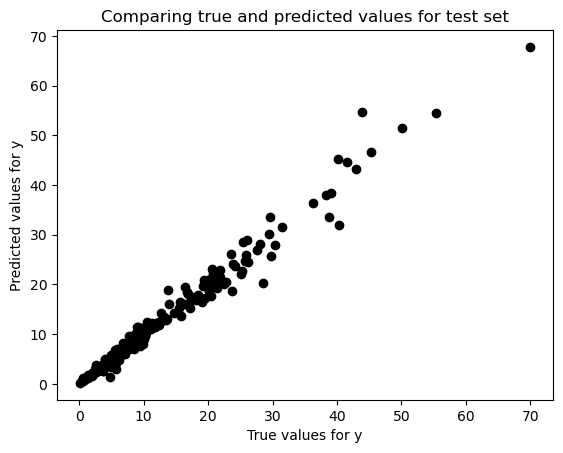

Slope =  0.9760138249950152
Intercept =  0.14851293061165727


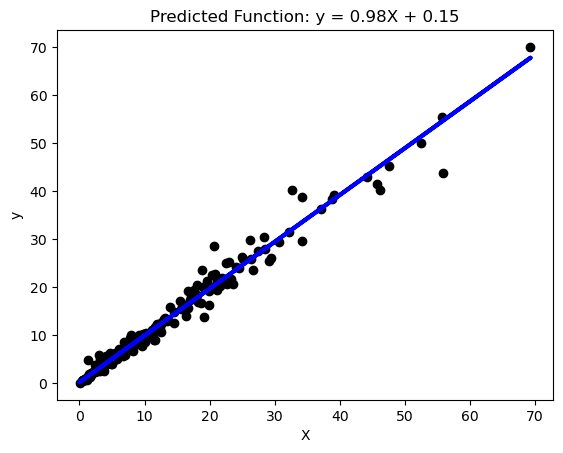

Root mean squared error = 1.3912
R-squared = 0.9834


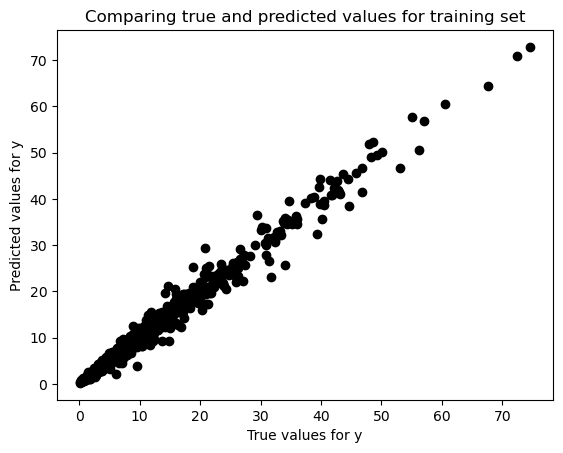

Slope =  0.9760138249950152
Intercept =  0.14851293061165727


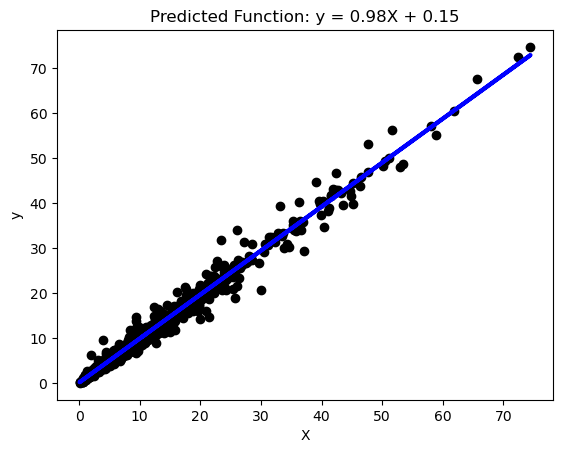


Multiple Regression for Unemployment Data
---------------------------------------------------



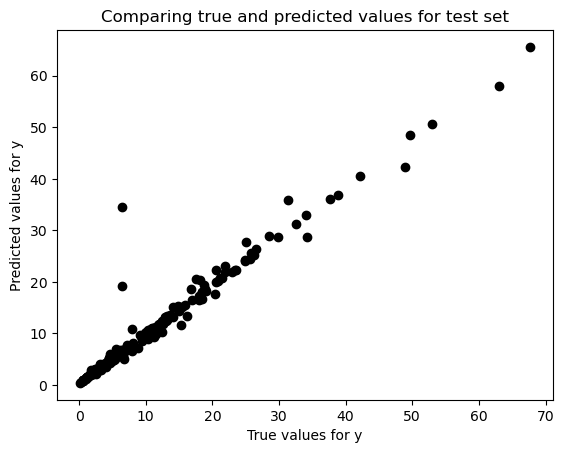

Root mean squared error = 2.3229
R-squared = 0.9531
Coefficients: [ 0.00693753 -0.17495212  1.11756285]
Intercept: 0.33727069236913465


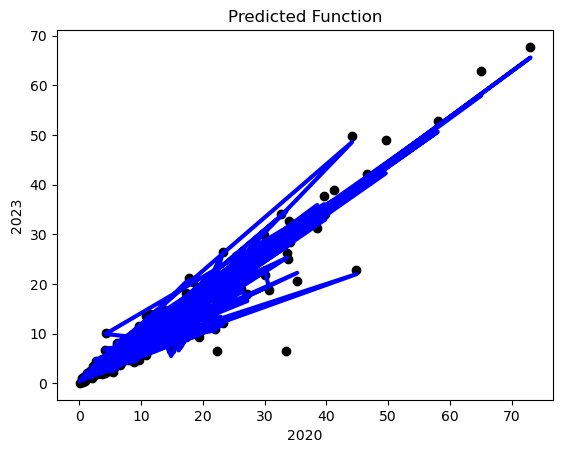

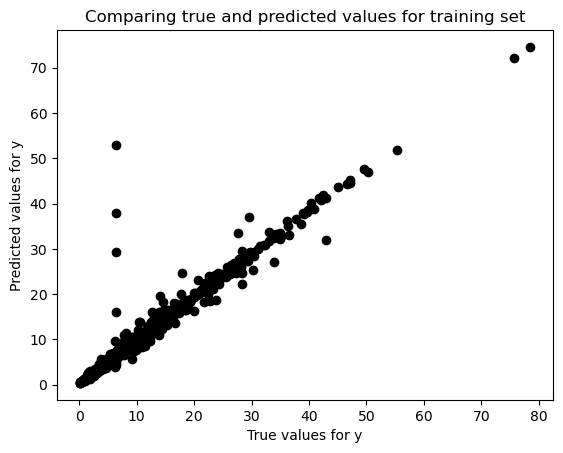

Root mean squared error = 2.3113
R-squared = 0.9435
Coefficients: [ 0.00693753 -0.17495212  1.11756285]
Intercept: 0.33727069236913465


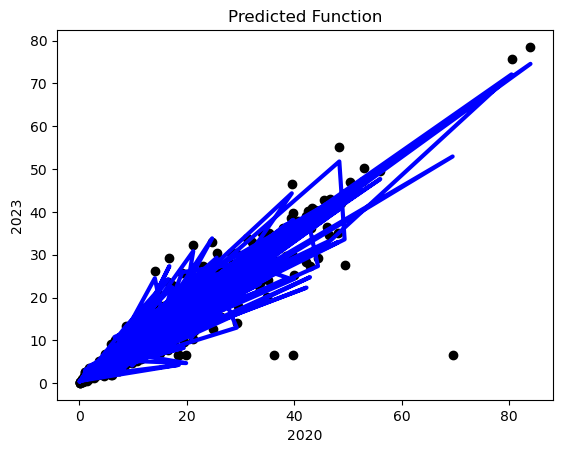

Simple linear Regression for Admission Data
---------------------------------------------------



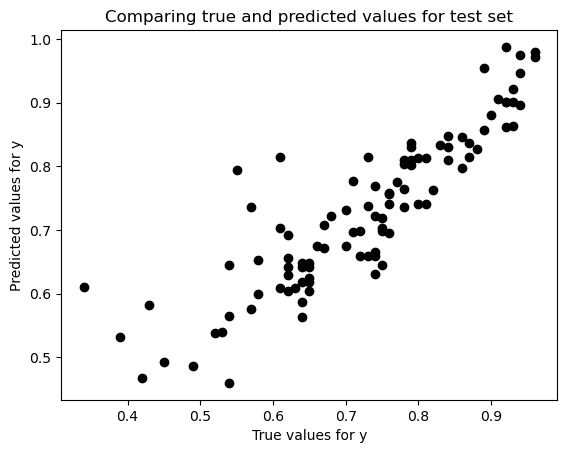

Root mean squared error = 0.0656
R-squared = 0.7772


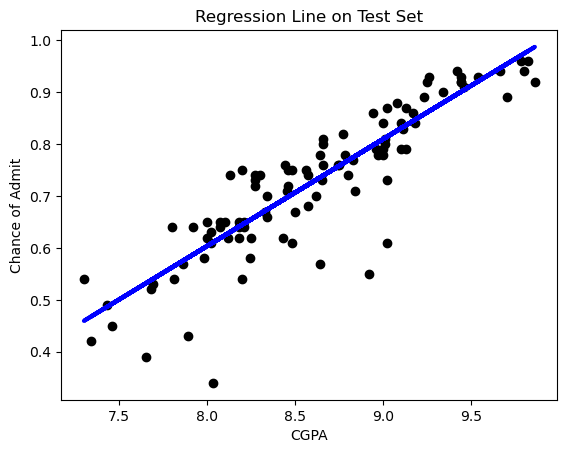

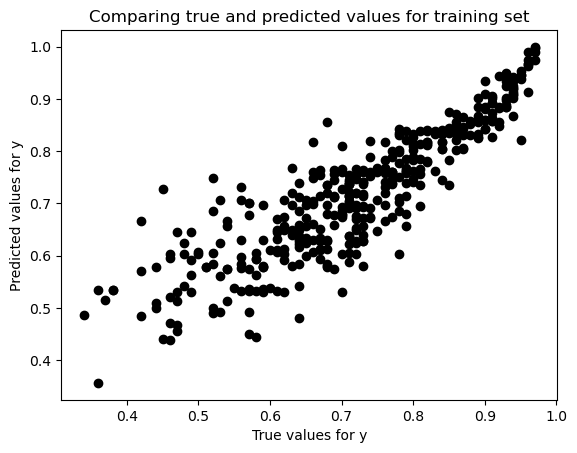

Root mean squared error = 0.0665
R-squared = 0.7789


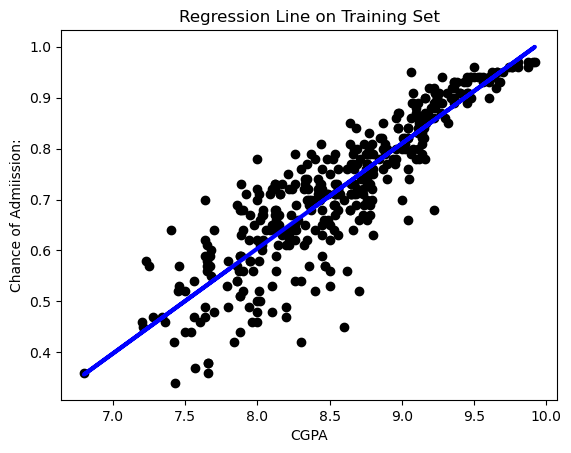

Multiple Regression for Admission Data
---------------------------------------------------



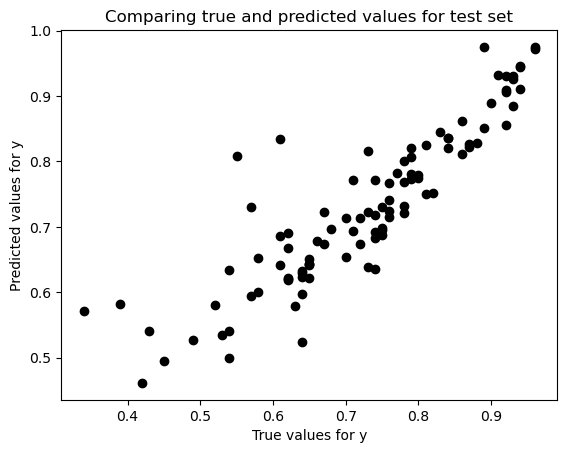

Root mean squared error = 0.0638
R-squared = 0.7891


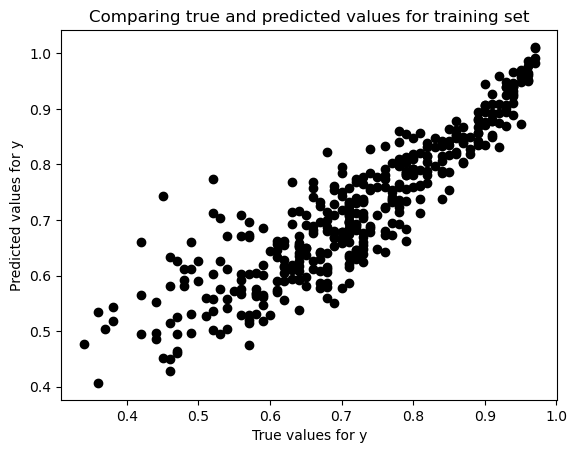

Root mean squared error = 0.0620
R-squared = 0.8081

Classification for Admission Data
---------------------------------------------------

Confusion Matrix:
 [[ 0  0  0]
 [ 0 29  6]
 [ 0 11 54]]
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

Not Admitted       0.90      0.83      0.86        65
    Admitted       0.72      0.83      0.77        35

    accuracy                           0.83       100
   macro avg       0.81      0.83      0.82       100
weighted avg       0.84      0.83      0.83       100



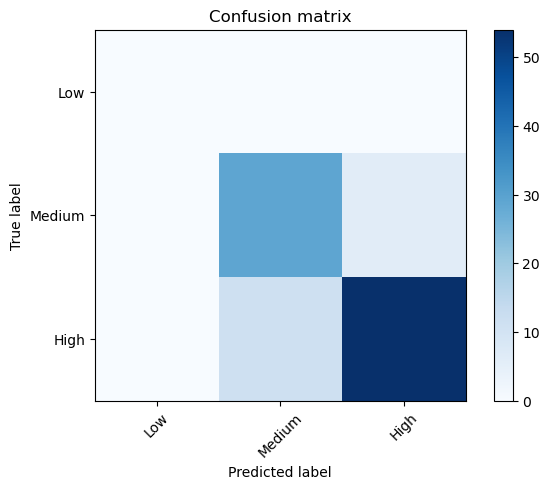

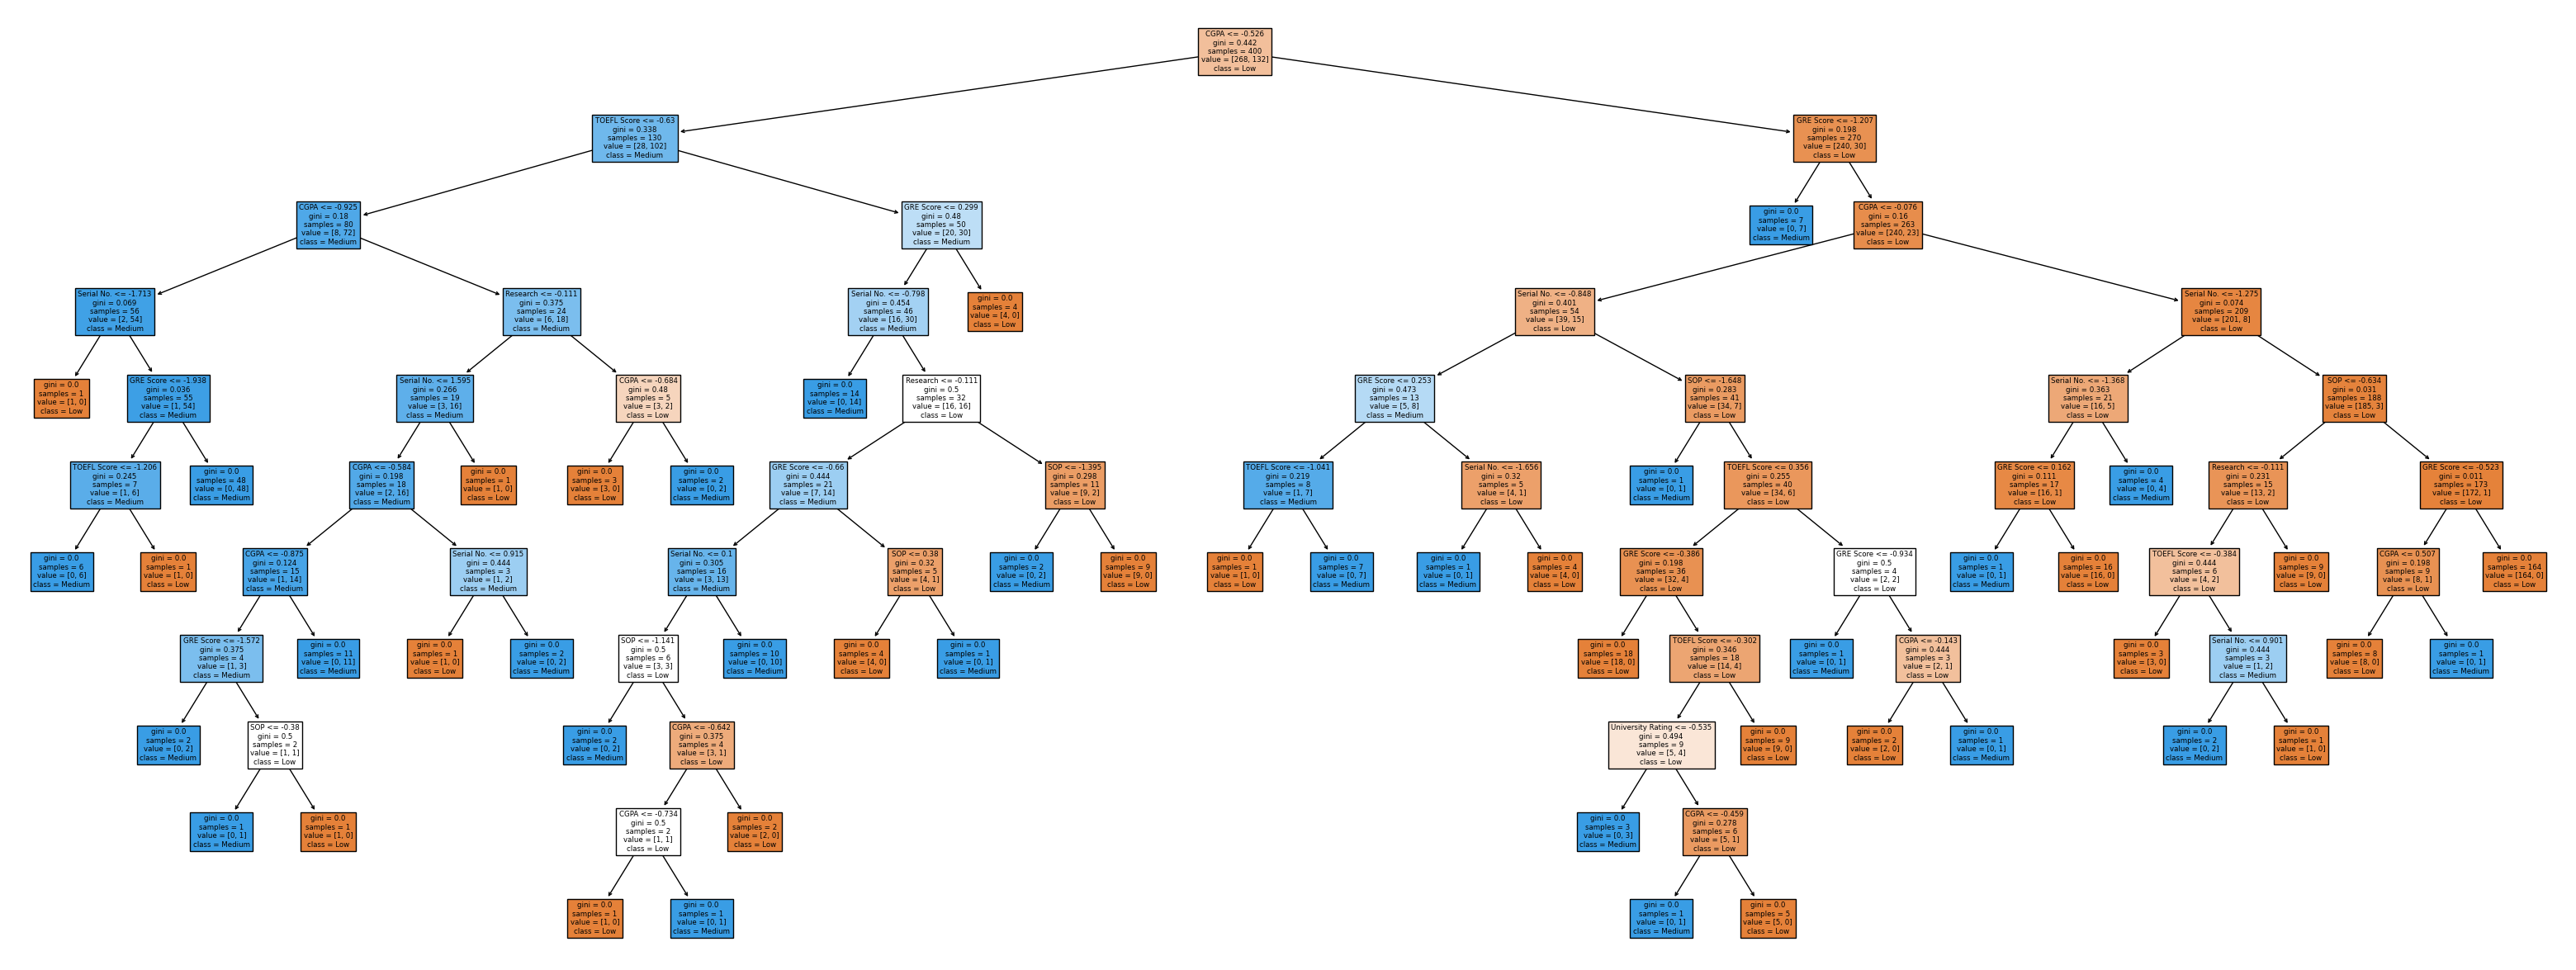

In [15]:
"""
Linear Regression and Classification
"""
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import graphviz 
#import pydotplus
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score,recall_score,classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Reading the Data Sets from the DataSets Folder(unemployment data set, admission data set)
path = "./DataSets/"

filename_read = os.path.join(path,"global_unemployment_data_v3.csv")
df_unemployment = pd.read_csv(filename_read, na_values=['NA','?'])

filename_read = os.path.join(path,"Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
df_admission = pd.read_csv(filename_read, na_values=['NA','?'])

#Data Preprocessing to make data ready for Part A and B below
df_unemployment['2022'] = df_unemployment['2022'].fillna(df_unemployment['2022'].median())
df_unemployment['2023'] = df_unemployment['2023'].fillna(df_unemployment['2023'].median())
df_unemployment['2024'] = df_unemployment['2024'].fillna(df_unemployment['2024'].median())

df_unemployment = df_unemployment.drop_duplicates()

#Part A: Simple Linear Regression
print('Simple Linear Regression for Unemployment Data')
print("---------------------------------------------------")
print()

#Splitting the Data Set
X = df_unemployment[['2014']]
y = df_unemployment[['2015']]

x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.2)

#Regression
regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

y_pred_test = regr.predict(x_test)

plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))
plt.show()

print('Slope = ', regr.coef_[0][0])
print('Intercept = ', regr.intercept_[0])

plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

y_pred_train = regr.predict(x_train)

plt.scatter(y_train, y_pred_train, color='black')
plt.title('Comparing true and predicted values for training set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R-squared = %.4f' % r2_score(y_train, y_pred_train))
plt.show()

print('Slope = ', regr.coef_[0][0])
print('Intercept = ', regr.intercept_[0])

plt.scatter(x_train, y_train,  color='black')
plt.plot(x_train, y_pred_train, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')
plt.show()
print()

#Part A: Multiple Regression
print('Multiple Regression for Unemployment Data')
print("---------------------------------------------------")
print()

# Assuming df_unemployment is your DataFrame containing the data
X = df_unemployment[['2020', '2021', '2022']]
y = df_unemployment['2023']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# Regression
regr = LinearRegression()

# Fitting the model
regr.fit(x_train, y_train)

# Predictions on test set
y_pred_test = regr.predict(x_test)

# Plotting true vs predicted values for test set
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
plt.show()

# Printing evaluation metrics for test set
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

# Printing coefficients and intercept
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

# Plotting predicted function
plt.scatter(x_test['2020'], y_test,  color='black')
plt.plot(x_test['2020'], y_pred_test, color='blue', linewidth=3)
plt.title('Predicted Function')
plt.xlabel('2020')
plt.ylabel('2023')
plt.show()

# Predictions on training set
y_pred_train = regr.predict(x_train)

# Plotting true vs predicted values for training set
plt.scatter(y_train, y_pred_train, color='black')
plt.title('Comparing true and predicted values for training set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
plt.show()

# Printing evaluation metrics for training set
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R-squared = %.4f' % r2_score(y_train, y_pred_train))

# Printing coefficients and intercept
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

# Plotting predicted function
plt.scatter(x_train['2020'], y_train,  color='black')
plt.plot(x_train['2020'], y_pred_train, color='blue', linewidth=3)
plt.title('Predicted Function')
plt.xlabel('2020')
plt.ylabel('2023')
plt.show()

#Part B: Regression
print('Simple linear Regression for Admission Data')
print("---------------------------------------------------")
print()

X = df_admission[['CGPA']]  # Feature: CGPA
y = df_admission[['Chance of Admit ']]  # Target: Chance of Admit

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# Regression
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Predictions on the test set
y_pred_test = regr.predict(x_test)

# Scatter plot comparing true and predicted values for the test set
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
plt.show()

# Evaluation metrics for the test set
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

# Plotting the regression line on the test set
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred_test, color='blue', linewidth=3)
plt.title('Regression Line on Test Set')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.show()

# Predictions on the training set
y_pred_train = regr.predict(x_train)

# Scatter plot comparing true and predicted values for the training set
plt.scatter(y_train, y_pred_train, color='black')
plt.title('Comparing true and predicted values for training set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
plt.show()

# Evaluation metrics for the training set
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R-squared = %.4f' % r2_score(y_train, y_pred_train))

# Plotting the regression line on the training set
plt.scatter(x_train, y_train, color='black')
plt.plot(x_train, y_pred_train, color='blue', linewidth=3)
plt.title('Regression Line on Training Set')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admiission:')
plt.show()

#Part B- Section 2: Multiple Regression
print('Multiple Regression for Admission Data')
print("---------------------------------------------------")
print()

X = df_admission[['GRE Score', 'TOEFL Score', 'CGPA']]  # Features
y = df_admission[['Chance of Admit ']]  # Target

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# Regression
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Predictions on the test set
y_pred_test = regr.predict(x_test)

# Since we are now using multiple features, plotting a regression line as done before is not straightforward
# Instead, let's focus on the evaluation metrics and scatter plot comparing true and predicted values for the test set

# Scatter plot for the test set
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
plt.show()

# Evaluation metrics for the test set
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

# Predictions on the training set
y_pred_train = regr.predict(x_train)

# Scatter plot for the training set
plt.scatter(y_train, y_pred_train, color='black')
plt.title('Comparing true and predicted values for training set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
plt.show()

# Evaluation metrics for the training set
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R-squared = %.4f' % r2_score(y_train, y_pred_train))
print()

#Part B: Classification
print('Classification for Admission Data')
print("---------------------------------------------------")
print()

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

df_admission['Admission_Category'] = pd.cut(df_admission['Chance of Admit '],
                                            bins=[0, 0.33, 0.66, 1],
                                            labels=['Low', 'Medium', 'High'])

    
X = df_admission.drop(['Chance of Admit ', 'Admission_Category'], axis=1)
y = df_admission['Admission_Category']

class_labels = ["Not Admitted", "Admitted"] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High'])
print("Confusion Matrix:\n",confusion)

plot_confusion_matrix(confusion, ['Low', 'Medium', 'High'])
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_labels))


plt.figure(figsize=(40, 15))
plot_tree(model, feature_names=X.columns.tolist(), class_names=['Low', 'Medium', 'High'], filled=True)
plt.show()